# Prediction of Solar Energy Potential Based on Weather and Location Data

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df = pd.read_csv('Pasion et al dataset.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('Pasion et al dataset.csv')

# Initial Data Understanding and Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [5]:
df.sample(20)

Location      Date  Time  Latitude  Longitude  Altitude  \
17086      Travis  20180127  1400     38.16    -121.56         1   
19492       USAFA  20180111  1200     38.95    -104.83      1947   
15832      Travis  20170626  1200     38.16    -121.56         1   
6493         JDMT  20180326  1500     26.98     -80.11         2   
5805         JDMT  20171110  1300     26.98     -80.11         2   
16979      Travis  20180112  1315     38.16    -121.56         1   
19408       USAFA  20170926  1430     38.95    -104.83      1947   
8313    Malmstrom  20180405  1345     47.52    -111.18      1043   
12905      Offutt  20180809  1200     41.13     -95.75       380   
10671   March AFB  20180407  1115     33.90    -117.26       458   
9526    March AFB  20170827  1200     33.90    -117.26       458   
14447    Peterson  20180214  1100     38.82    -104.71      1879   
1236      Grissom  20171201  1400     40.67     -86.15       239   
9215    Malmstrom  20180928  1100     47.52    -111.18      1043   
3860   Hill Weber  20180130  1400     41.15    -111.99      1370   
12883      Offutt  20180806  1030     41.13     -95.75       380   
6798      Kahului  20171109  1000     20.89    -156.44         2   
20377       USAFA  20180620  1500     38.95    -104.83      1947   
16387      Travis  20171001  1145     38.16    -121.56         1   
8201    Malmstrom  20180318  1400     47.52    -111.18      1043   

         YRMODAHRMI  Month  Hour  Season  Humidity  AmbientTemp   PolyPwr  \
17086  2.018010e+11      1    14  Winter  47.51587     19.42780  11.77291   
19492  2.018010e+11      1    12  Winter  66.10107      4.60609  10.70428   
15832  2.017060e+11      6    12  Summer  42.93823     26.48994  22.79759   
6493   2.018030e+11      3    15  Spring  34.82666     37.99835  25.16842   
5805   2.017110e+11     11    13    Fall  40.51514     41.27388  26.53401   
16979  2.018010e+11      1    13  Winter  74.82910     17.37839  15.19657   
19408  2.017090e+11      9    14    Fall  52.01416     18.13118   4.44814   
8313   2.018040e+11      4    13  Spring  62.28027      1.98517   4.99583   
12905  2.018080e+11      8    12  Summer  50.97656     35.51086  19.77545   
10671  2.018040e+11      4    11  Spring  41.33301     29.07814  14.55511   
9526   2.017080e+11      8    12  Summer  20.39185     38.67813  18.13684   
14447  2.018020e+11      2    11  Winter  10.13794     28.40340   8.97228   
1236   2.017120e+11     12    14  Winter  28.94897     21.31355   6.08285   
9215   2.018090e+11      9    11    Fall  67.61475      9.72206   2.60361   
3860   2.018010e+11      1    14  Winter  41.07666     11.61789   3.65996   
12883  2.018080e+11      8    10  Summer  55.03540     32.92519   7.35058   
6798   2.017110e+11     11    10    Fall  53.86963     30.36217  15.38873   
20377  2.018060e+11      6    15  Summer  20.62988     36.12015   4.92624   
16387  2.017100e+11     10    11    Fall  14.09912     28.37570  16.62724   
8201   2.018030e+11      3    14  Spring  64.04419      5.23552   3.23674   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  
17086           0        10.0    1027.5            722  
19492           7        10.0     800.1            722  
15832          26        10.0    1012.6            722  
6493           13        10.0    1020.6             75  
5805           11        10.0    1015.9            722  
16979           3        10.0    1024.8             14  
19408           7        10.0     802.3             17  
8313            7         0.0     901.8             21  
12905           5        10.0     978.1            722  
10671          13        10.0     960.1            722  
9526           10        10.0     959.2            722  
14447          14        10.0     808.6            240  
1236            5         4.0     994.4            722  
9215            8        10.0     901.8             23  
3860           11        10.0     854.3            130  
12883           5        10.0     979.1           

## Categorical Columns

Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :
- Date feature have the wrong format should be in datetime instead of integer
- Time feature values are wrong because it's written in the format of hour:minute but because of it's data time is integer, it became hourminute (ex : 10:00 -> 1000)
- Latitude and Longitude are useful if we want to make it into geographical plot in Tableau or similar tools, but in here it's already represented by Location, though i read that we could also do geospatial analysis and mapping in python using libraries like Arcpy, Geopandas, Geoplot, etc combined with specific tools/software but i haven't learn details of it right now probably later in the future
- YRMODAHRMI (year, month, day, hour, minute) is actually similar to Date, but it has more detailed date information, probably will check what the values are like since it has so many digits
- There are also separate feature for Month and Hour, we could use this and even though we could extract similar information in YRMODAHRMI feature
- As for categorical feature like Location and Season potentially could be encoded by one-hot enxoding
- Several features scientifically could have high correlation to each other for example Altitude with Pressure and Humidity, but we will check details of this later in bivariate analysis
- Feature PolyPwr is the target variable, we could move it to the last order in dataframe (personal preference)

**! Update on the values of YRMODAHRMI feature** : 

- It does not actually represent year, month, day, hour, minute completely. This in investigated using the pd.set_option('display.float_format', '{:.15f}'.format) to set the values in pandas so that we can see all the digits but here is the example value of the YRMODAHRMI feature 201712000000.000000000000000.

- It can be seen that it only gives you the information of year and month only, so this feature will not be used later.

Which means as for the date and time information, the only ones that we could extract other than the avaible ones are year and day only (month and hour already have their own)

In [6]:
# # Initial data transformation :  converting column name to lowercase
# df.columns = df.columns.str.lower()

In [7]:
#Extract year and day value
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [8]:
# Re-arrange the columns (PolyPwr in last)
df_1 = df.drop(columns='PolyPwr')
df_2 = df['PolyPwr']
df = pd.concat([df_1, df_2], axis='columns')

In [9]:
#Initial drop for obvious unnecessary features
df = df.drop(columns=['Time', 'YRMODAHRMI', 'Latitude', 'Longitude'])

In [10]:
df

Location       Date  Altitude  Month  Hour  Season  Humidity  \
0      Camp Murray 2017-12-03        84     12    11  Winter  81.71997   
1      Camp Murray 2017-12-03        84     12    13  Winter  96.64917   
2      Camp Murray 2017-12-03        84     12    13  Winter  93.61572   
3      Camp Murray 2017-12-04        84     12    12  Winter  77.21558   
4      Camp Murray 2017-12-04        84     12    14  Winter  54.80347   
...            ...        ...       ...    ...   ...     ...       ...   
21040        USAFA 2018-09-28      1947      9    15    Fall  11.66992   
21041        USAFA 2018-09-29      1947      9    13    Fall  18.22510   
21042        USAFA 2018-09-29      1947      9    14    Fall  15.52124   
21043        USAFA 2018-09-29      1947      9    15    Fall   6.63452   
21044        USAFA 2018-10-01      1947     10    14    Fall  22.58301   

       AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Year  \
0         12.86919           5        10.0    1010.6            722  2017   
1          9.66415           0        10.0    1011.3             23  2017   
2         15.44983           5        10.0    1011.6             32  2017   
3         10.36659           5         2.0    1024.4              6  2017   
4         16.85471           3         3.0    1023.7              9  2017   
...            ...         ...         ...       ...            ...   ...   
21040     43.22510          14        10.0     802.3            722  2018   
21041     28.98247          13        10.0     799.2            722  2018   
21042     33.49167          10        10.0     798.4            722  2018   
21043     51.62163          10        10.0     797.8            722  2018   
21044     32.83958          15        10.0     801.2            110  2018   

       Day   PolyPwr  
0        3   2.42769  
1        3   2.46273  
2        3   4.46836  
3        4   1.65364  
4        4   6.57939  
...    ...       ...  
21040   28   9.79611  
21041   29  10.88992  
21042   29   8.24479  
21043   29  12.47328  
21044    1   6.39732  

[21045 rows x 15 columns]

In [11]:
#Checking missing values
df.isna().sum()

Location         0
Date             0
Altitude         0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
Year             0
Day              0
PolyPwr          0
dtype: int64

In [12]:
#Checking amount of duplicated values
df.duplicated().sum()

0

There are no missing or duplicated values in this dataset

# Descriptive Statistics

In [13]:
df.columns

Index(['Location', 'Date', 'Altitude', 'Month', 'Hour', 'Season', 'Humidity',
       'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling',
       'Year', 'Day', 'PolyPwr'],
      dtype='object')

In [14]:
#Grouping columns based on their types

nums = ['Altitude', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']
cats = ['Location', 'Season']
dates = ['Date', 'Year', 'Month', 'Day']

In [15]:
#Describe numerical columns
df[nums].describe().transpose()

count        mean         std        min        25%  \
Altitude       21045.0  798.843668  770.681794    1.00000    2.00000   
Hour           21045.0   12.627845    1.672952   10.00000   11.00000   
Humidity       21045.0   37.121941   23.823011    0.00000   17.52930   
AmbientTemp    21045.0   29.285117   12.366820  -19.98177   21.91528   
Wind.Speed     21045.0   10.318318    6.385030    0.00000    6.00000   
Visibility     21045.0    9.700071    1.351949    0.00000   10.00000   
Pressure       21045.0  925.944747   85.215659  781.70000  845.50000   
Cloud.Ceiling  21045.0  515.966785  301.903379    0.00000  140.00000   
PolyPwr        21045.0   12.978583    7.123255    0.25733    6.40457   

                     50%         75%         max  
Altitude       458.00000  1370.00000  1947.00000  
Hour            13.00000    14.00000    15.00000  
Humidity        33.12378    52.59399    99.98779  
AmbientTemp     30.28915    37.47467    65.73837  
Wind.Speed       9.00000    14.00000    49.00000  
Visibility      10.00000    10.00000    10.00000  
Pressure       961.10000  1008.90000  1029.50000  
Cloud.Ceiling  722.00000   722.00000   722.00000  
PolyPwr         13.79870    18.86365    34.28502

In [16]:
#Describe categorical columns
df[cats].describe().transpose()

count unique     top  freq
Location  21045     12  Travis  2746
Season    21045      4  Summer  8208

In [17]:
#Categorical Feature Counts
for col in cats :
  print(f'Value counts untuk {col} :')
  print(df[col].value_counts(), '\n')

Value counts untuk Location :
Location
Travis         2746
Peterson       2640
USAFA          2573
Hill Weber     2384
March AFB      2204
JDMT           1779
Malmstrom      1517
Grissom        1487
Camp Murray    1113
Kahului         941
Offutt          881
MNANG           780
Name: count, dtype: int64 

Value counts untuk Season :
Season
Summer    8208
Spring    4808
Fall      4407
Winter    3622
Name: count, dtype: int64 



# Univariate Analysis

## Numerical Columns

In [18]:
#Check number of subplots that will be make
len(df[nums].columns)

9

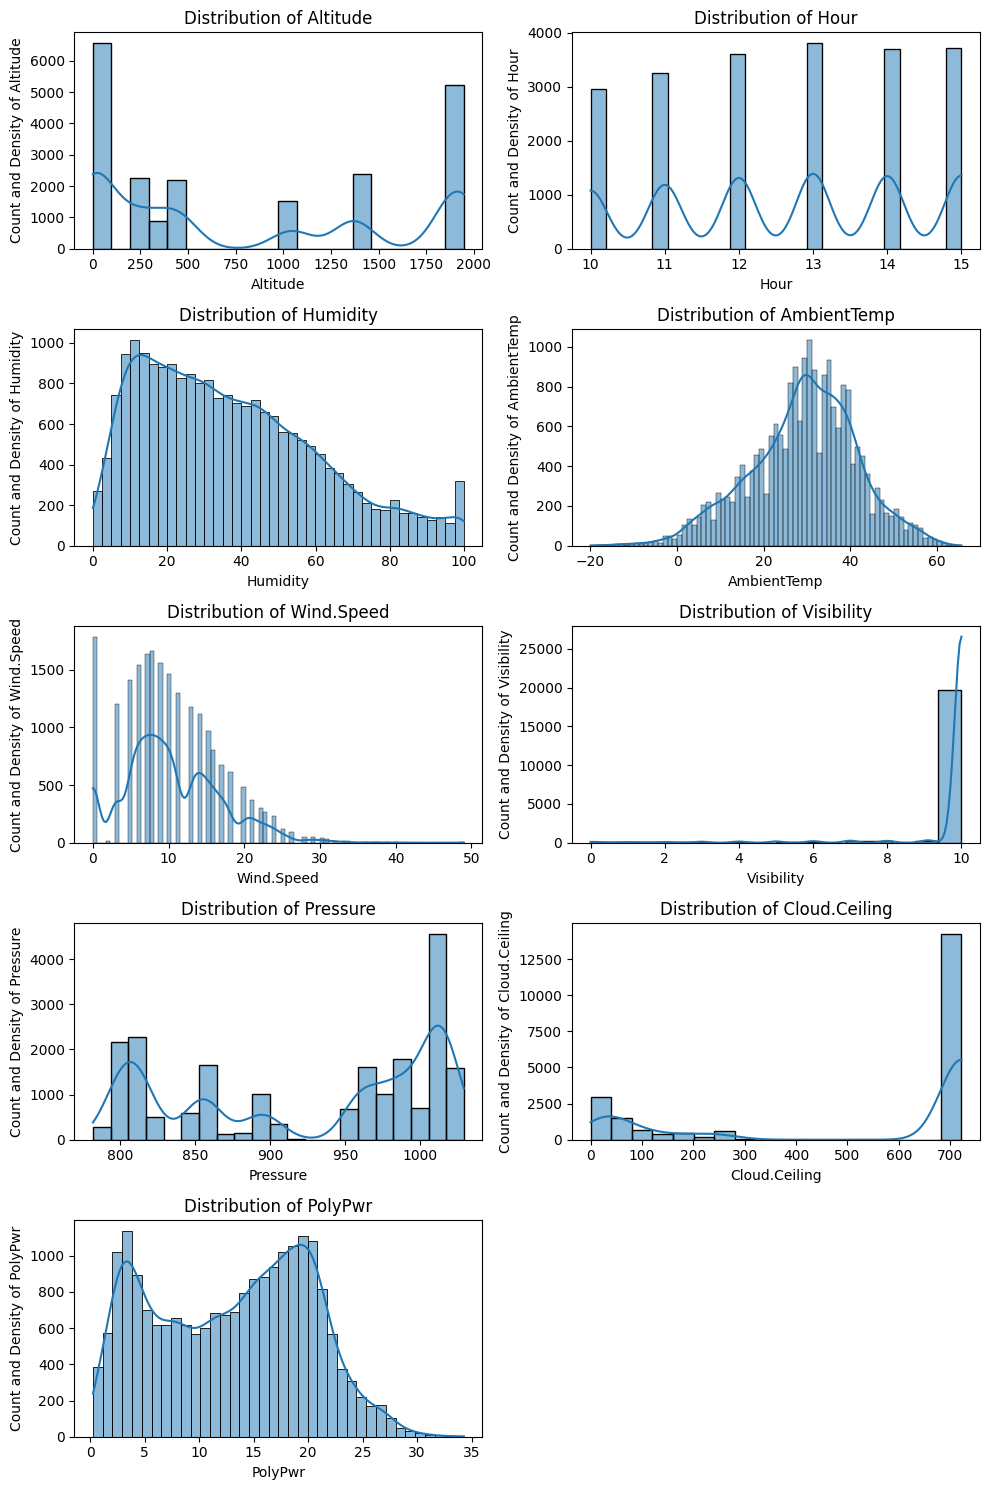

In [19]:
# Histplot with kde

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.histplot(ax=axes[i], x=df[nums[i]], kde=True)
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

    plt.tight_layout()

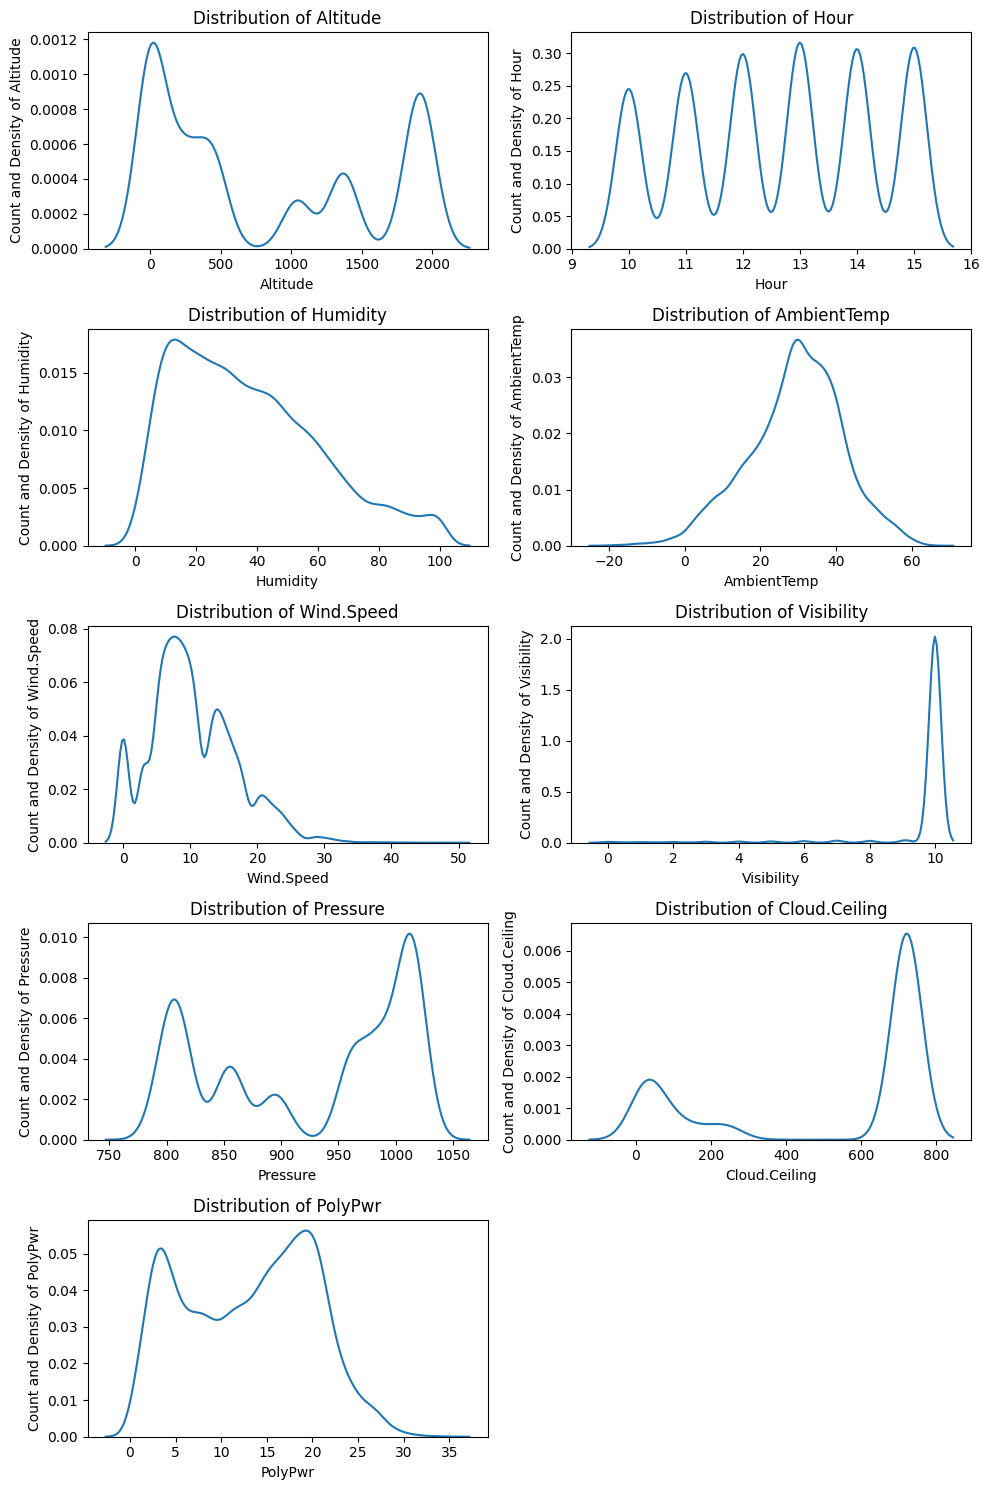

In [20]:
# Focusing only on kde

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.kdeplot(ax=axes[i], x=df[nums[i]])
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

    plt.tight_layout()

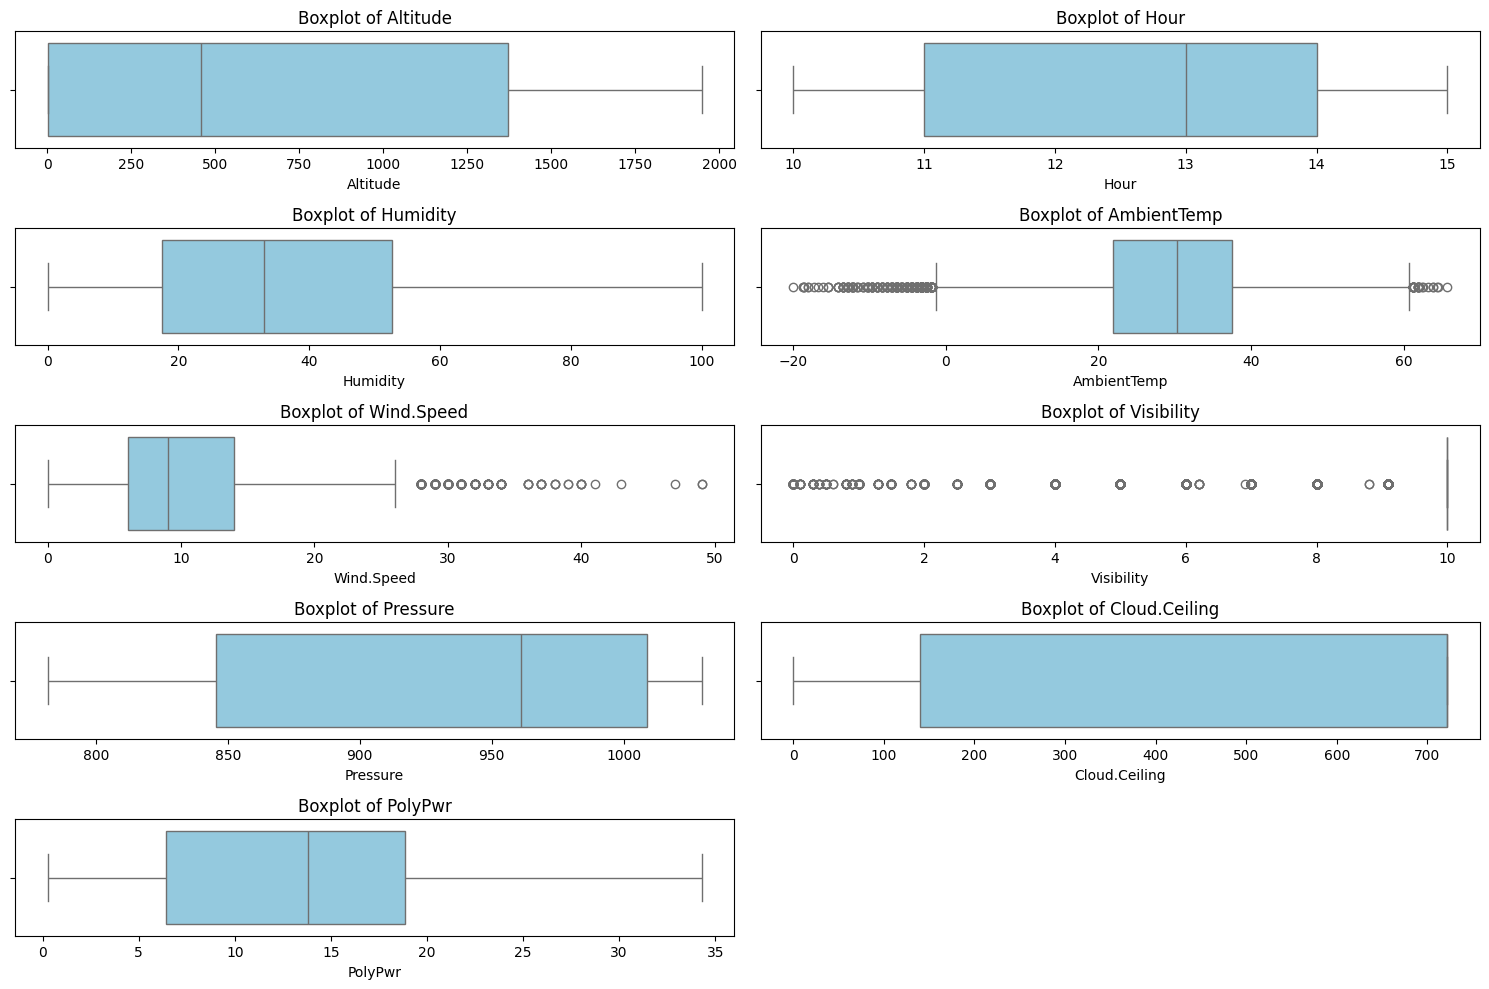

In [21]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

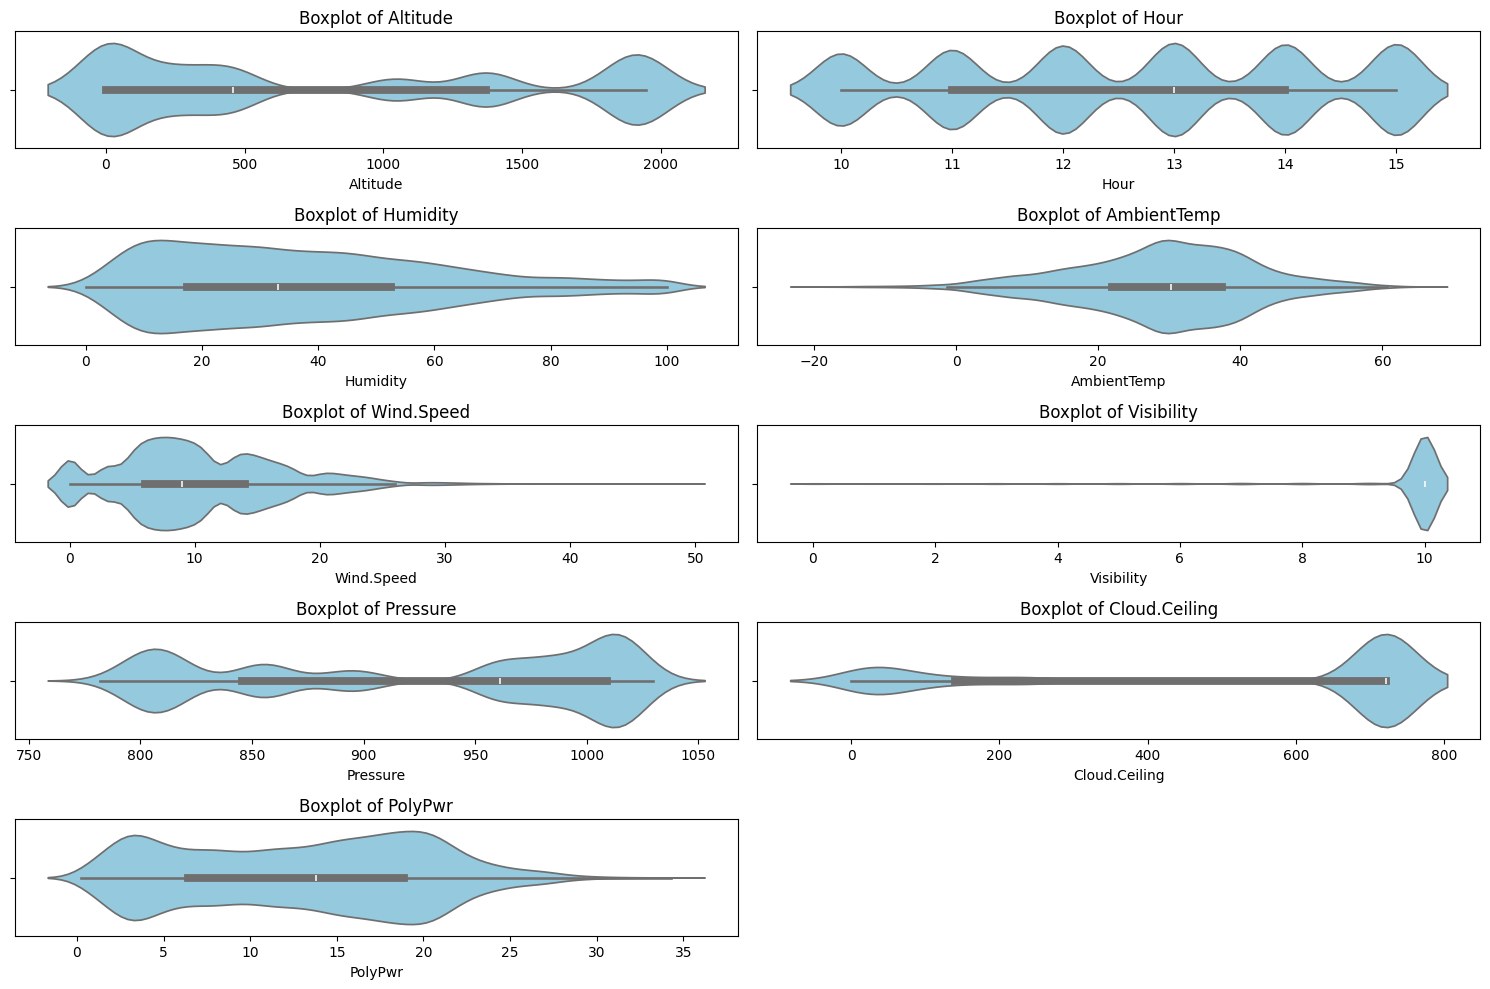

In [37]:
# Violinplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

There are not many features with outliers, only AmbientTemp, Wind.Speed, and Visibility

## Categorical Columns

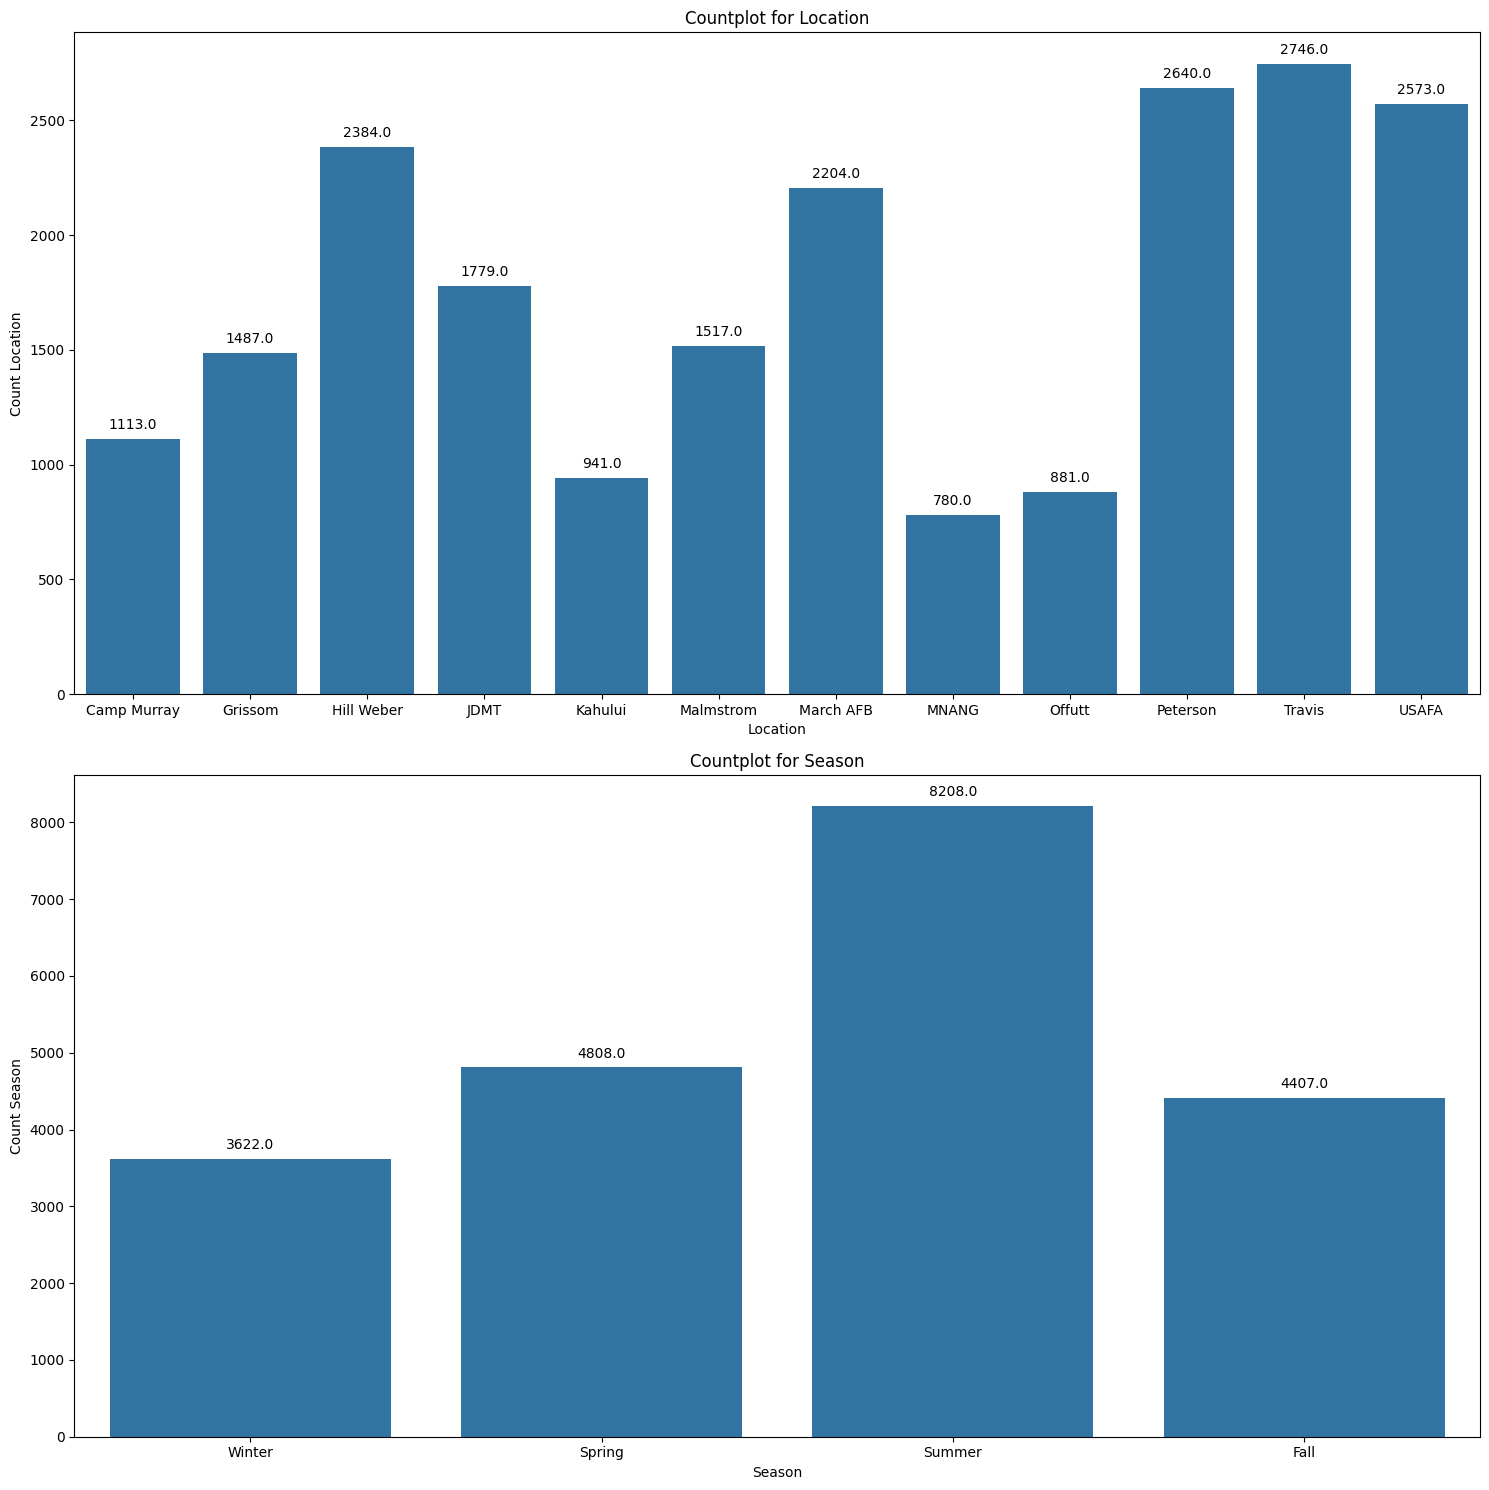

In [22]:
#Countplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

for i in range(len(cats)):
    ax = sns.countplot(ax=axes[i], x=df[cats[i]])
    axes[i].set_title(f'Countplot for {cats[i]}')
    axes[i].set_ylabel(f'Count {cats[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


# Bivariate/Multivariate Analysis

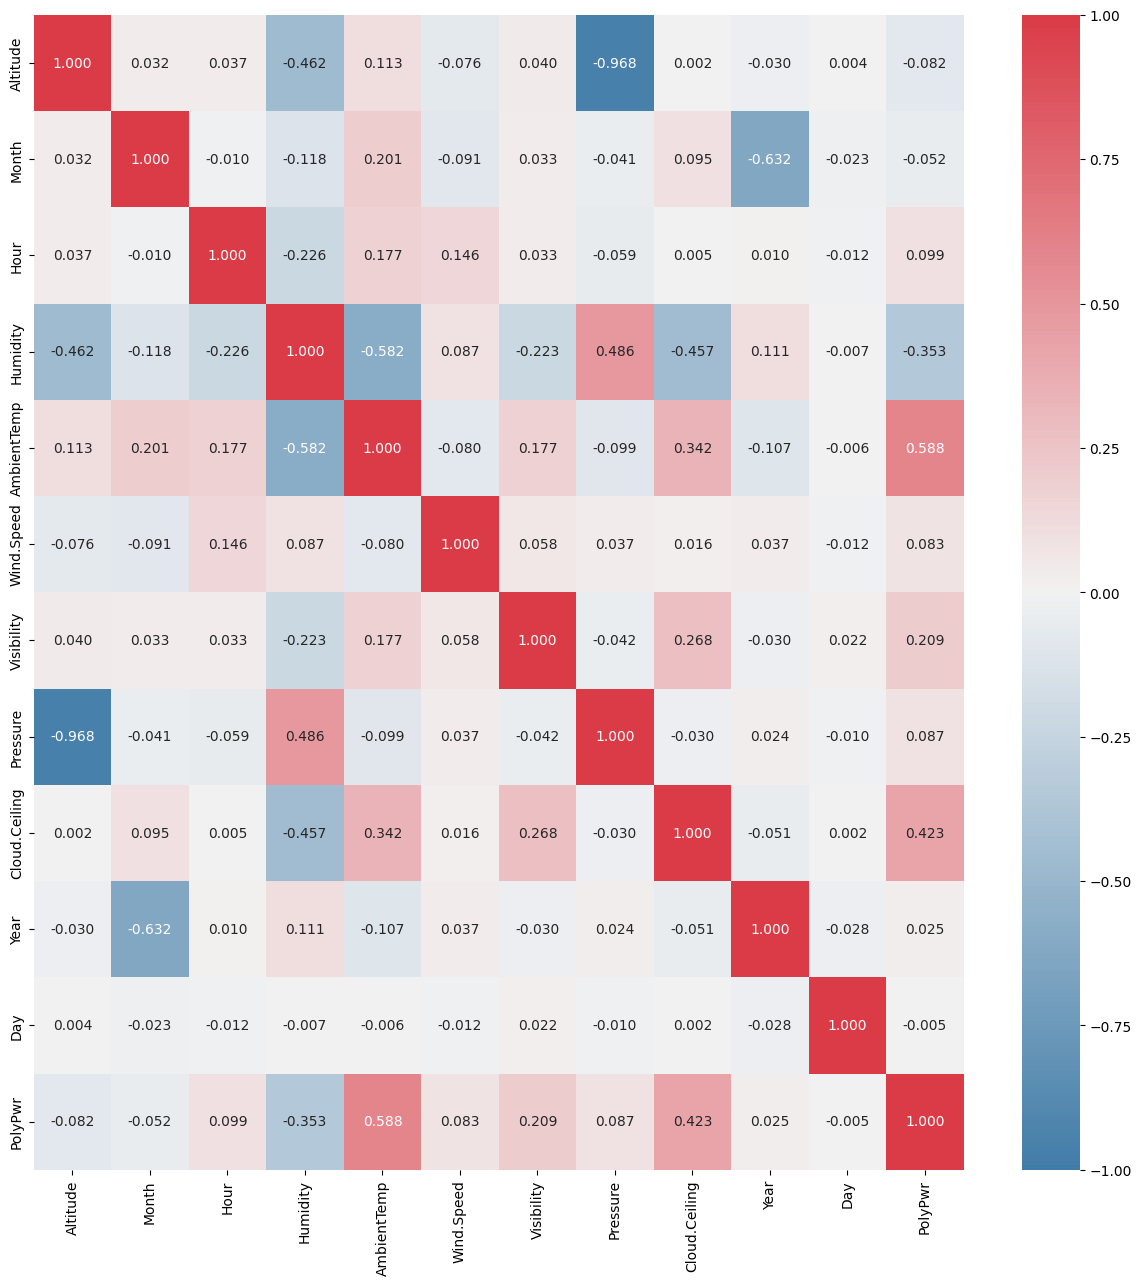

In [23]:
# Heatmap (corr spearman)
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case we use spearman correlation that is more robust/accurate in capturing non-linear (can be seen from pairplot down below) correlation of features. Some feature that have high correlation to target are Humidity, AmbientTemp, Visibility, and Cloud.Ceiling. We also likely to drop or not use Altitude feature since it has really high correlation to Pressure to avoid multicollinearity.

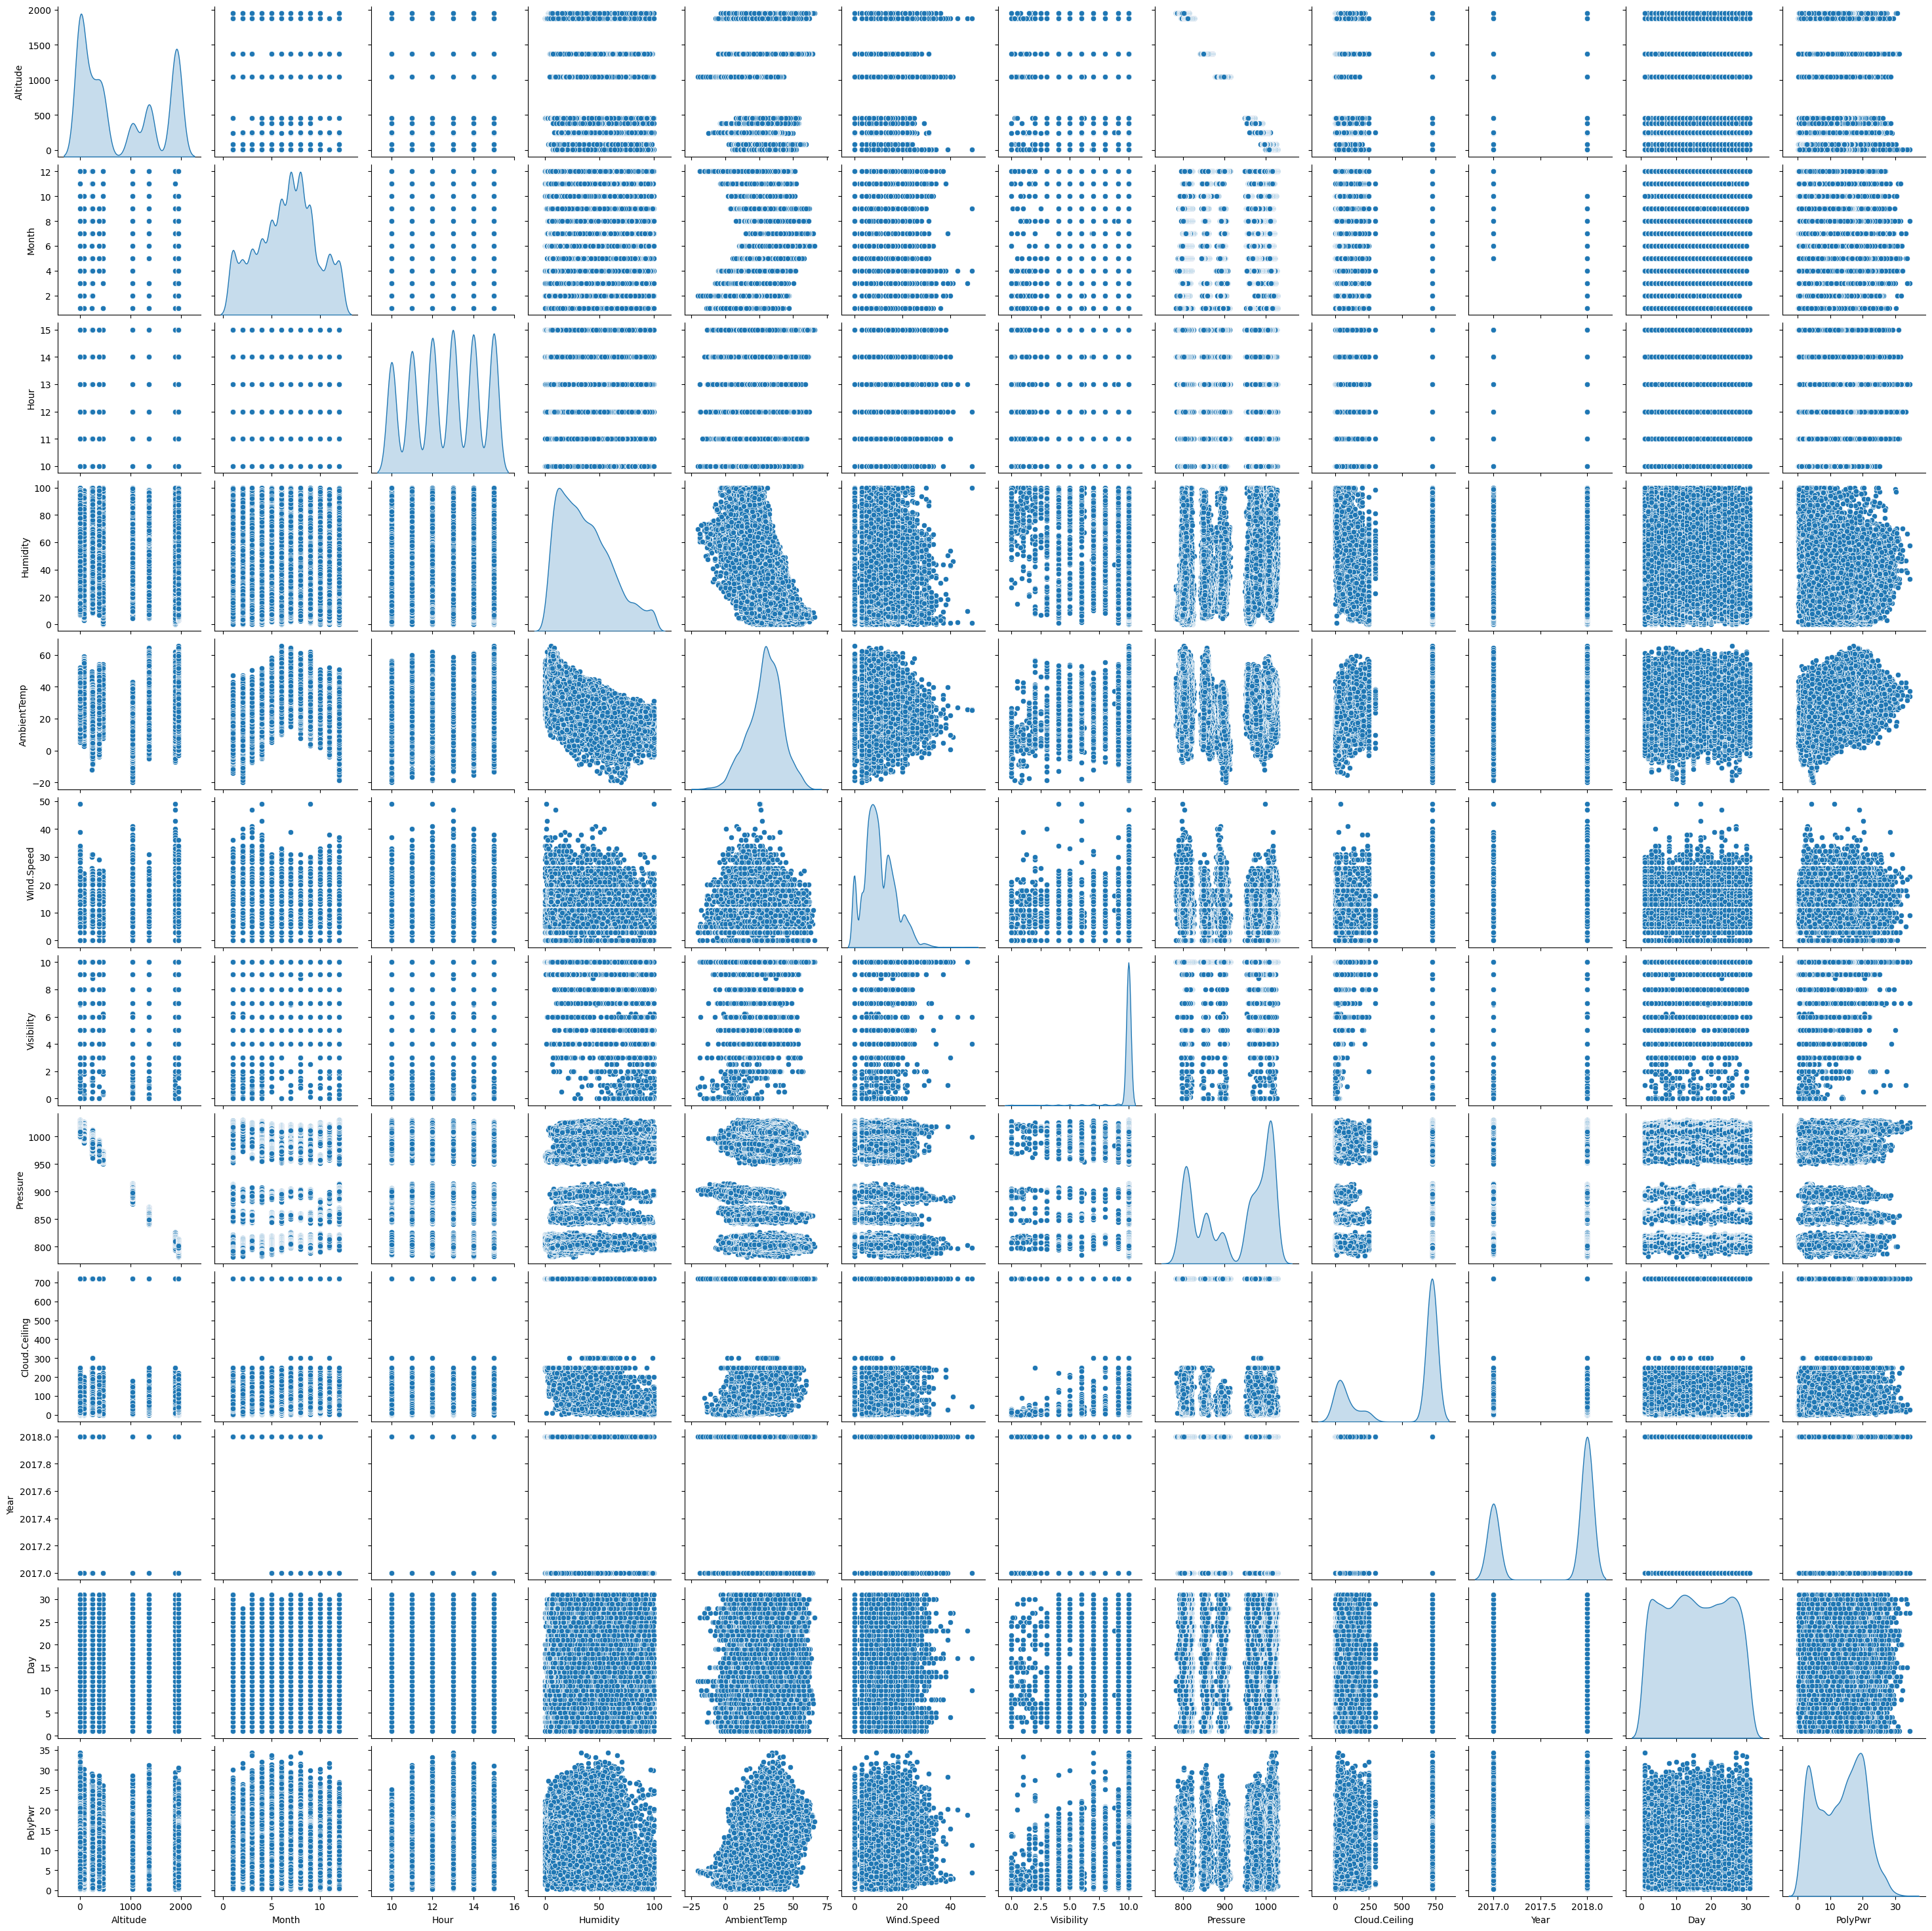

In [24]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

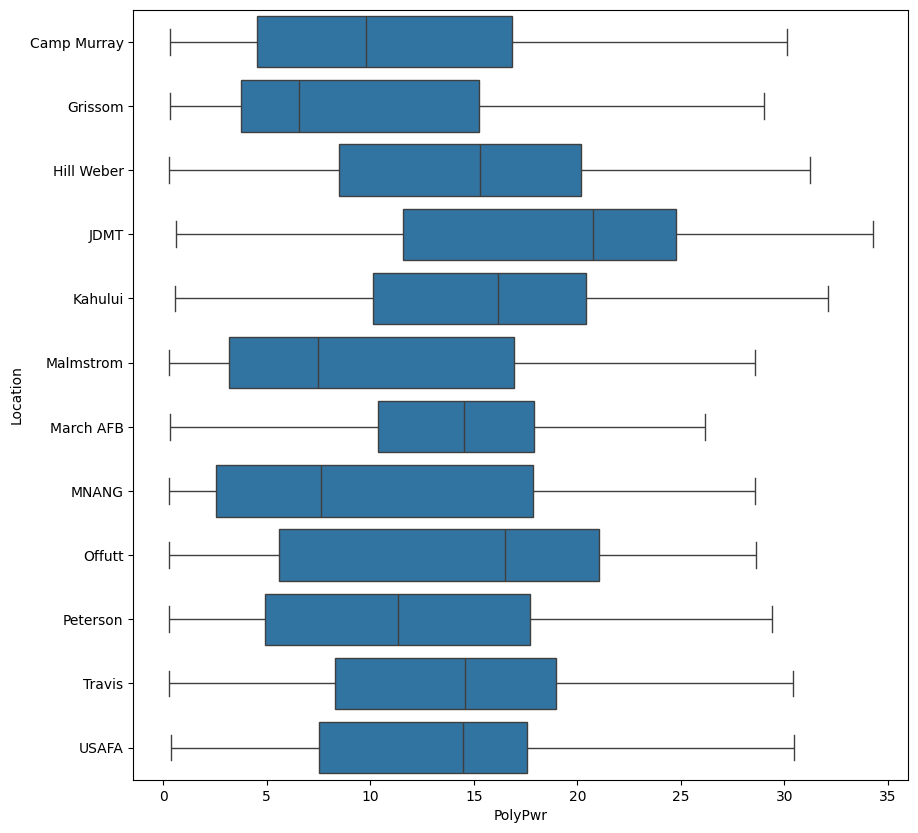

In [25]:
#Boxplot of PolyPwr by Location
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='PolyPwr', y='Location')
plt.show()

In [26]:
#Mean PolyPwr by Season
df_mean_power_season = df.groupby('Season').agg({'PolyPwr' : ['mean']})
df_mean_power_season

PolyPwr
             mean
Season           
Fall    11.167499
Spring  14.192405
Summer  15.320546
Winter   8.263660

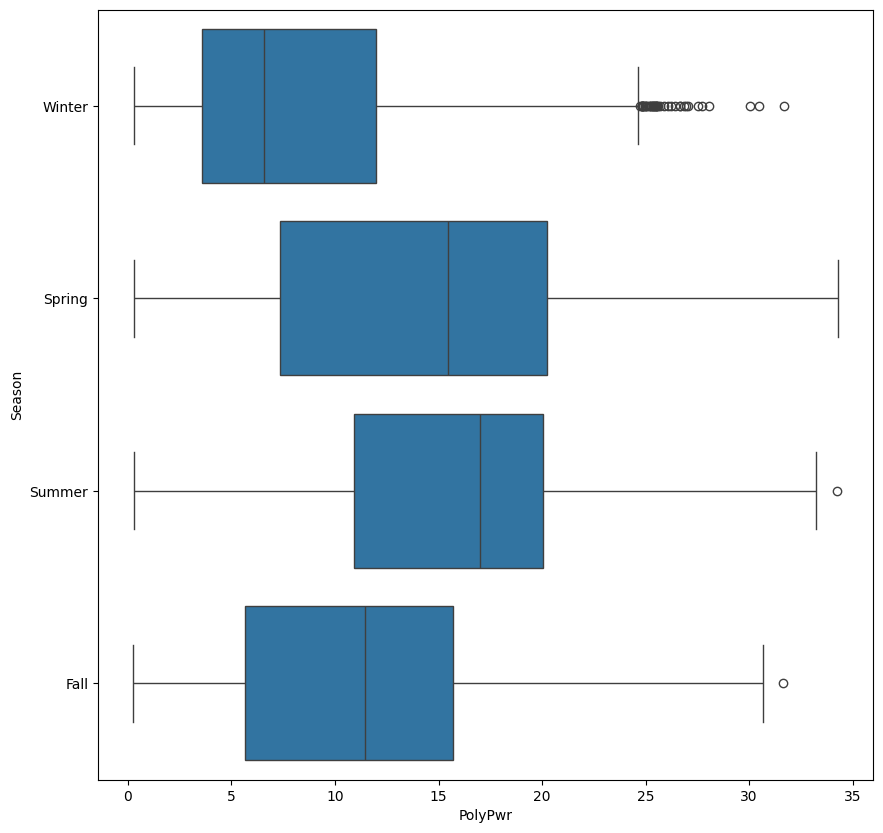

In [27]:
#Boxplot of PolyPwr by Season
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='PolyPwr', y='Season')
plt.show()

Summer as expected have the highest median PolyPwr with the lowest variability and highest overall mean of PolyPwr from all season

# Pre-Processing & Feature Engineering

In [38]:
# Make a copy of original dataframe for preprocessing and encoding process

df_encoding = df.copy()

df_encoding.sample(5)

Location       Date  Altitude  Month  Hour  Season  Humidity  \
4494   Hill Weber 2018-06-26      1370      6    15  Summer   5.20020   
12988      Offutt 2018-09-04       380      9    12    Fall  94.42139   
19442       USAFA 2017-10-02      1947     10    12    Fall  35.60791   
3527   Hill Weber 2017-11-19      1370     11    14    Fall  12.84180   
1910      Grissom 2018-06-19       239      6    14  Summer  98.06519   

       AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Year  \
4494      55.49889           8        10.0     853.7            722  2018   
12988     27.74628          10        10.0     978.4             22  2018   
19442     20.66399          15        10.0     792.5             25  2017   
3527      34.18404           6        10.0     857.5            722  2017   
1910      24.52866          10        10.0     984.2            722  2018   

       Day   PolyPwr  
4494    26  21.61112  
12988    4   1.81537  
19442    2   2.49534  
3527    19  15.27417  
1910    19   2.09822

In [39]:
# Drop features that are irrelevant and we will not use for this modelling case

df_encoding = df_encoding.drop(columns=['Date', 'Altitude', 'Year'])

In [40]:
# One-hot encoding for Location

onehots = pd.get_dummies(df_encoding['Location'], prefix='Location')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Location after one-hot encoding
df_encoding.drop(columns='Location', inplace=True)

In [41]:
# One-hot encoding for Season

onehots = pd.get_dummies(df_encoding['Season'], prefix='Season')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Location after one-hot encoding
df_encoding.drop(columns='Season', inplace=True)

In [42]:
#Check dataframe after encoding and drop irrelevant features
df_encoding

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
0         12    11  81.71997     12.86919           5        10.0    1010.6   
1         12    13  96.64917      9.66415           0        10.0    1011.3   
2         12    13  93.61572     15.44983           5        10.0    1011.6   
3         12    12  77.21558     10.36659           5         2.0    1024.4   
4         12    14  54.80347     16.85471           3         3.0    1023.7   
...      ...   ...       ...          ...         ...         ...       ...   
21040      9    15  11.66992     43.22510          14        10.0     802.3   
21041      9    13  18.22510     28.98247          13        10.0     799.2   
21042      9    14  15.52124     33.49167          10        10.0     798.4   
21043      9    15   6.63452     51.62163          10        10.0     797.8   
21044     10    14  22.58301     32.83958          15        10.0     801.2   

       Cloud.Ceiling  Day   PolyPwr  Location_Camp Murray  Location_Grissom  \
0                722    3   2.42769                     1                 0   
1                 23    3   2.46273                     1                 0   
2                 32    3   4.46836                     1                 0   
3                  6    4   1.65364                     1                 0   
4                  9    4   6.57939                     1                 0   
...              ...  ...       ...                   ...               ...   
21040            722   28   9.79611                     0                 0   
21041            722   29  10.88992                     0                 0   
21042            722   29   8.24479                     0                 0   
21043            722   29  12.47328                     0                 0   
21044            110    1   6.39732                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
0                        0              0                 0               0   
1                        0              0                 0               0   
2                        0              0                 0               0   
3                        0              0                 0               0   
4                        0              0                 0               0   
...                    ...            ...               ...             ...   
21040                    0              0                 0               0   
21041                    0              0                 0               0   
21042                    0              0                 0               0   
21043                    0              0                 0               0   
21044                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
0                       0                   0                0   
1                       0                   0                0   
2                       0                   0                0   
3                       0                   0                0   
4                       0                   0                0   
...                   ...                 ...              ...   
21040                   0                   0                0   
21041                   0                   0                0   
21042                   0                   0                0   
21043                   0                   0                0   
21044                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
0                      0                0               0            0   
1                      0                0               0            0   
2                      0                0               0            0   
3                      0                0               0            0 

In [43]:
# Re-arrange the columns (PolyPwr in last)
df_1 = df_encoding.drop(columns='PolyPwr')
df_2 = df_encoding['PolyPwr']
df_encoding = pd.concat([df_1, df_2], axis='columns')

# Feature Selection

At first we will just use all the features that we got after pre-processing, this part is just additional check to compare the result with df.corr() to see what will best features for prediction later

In [44]:
# Create temporary dataframe for testing SelectKBest

df_feature_target_relation = df_encoding.copy()
df_feature_target_relation.head()

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
0     12    11  81.71997     12.86919           5        10.0    1010.6   
1     12    13  96.64917      9.66415           0        10.0    1011.3   
2     12    13  93.61572     15.44983           5        10.0    1011.6   
3     12    12  77.21558     10.36659           5         2.0    1024.4   
4     12    14  54.80347     16.85471           3         3.0    1023.7   

   Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
0            722    3                     1                 0   
1             23    3                     1                 0   
2             32    3                     1                 0   
3              6    4                     1                 0   
4              9    4                     1                 0   

   Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
0                    0              0                 0               0   
1                    0              0                 0               0   
2                    0              0                 0               0   
3                    0              0                 0               0   
4                    0              0                 0               0   

   Location_Malmstrom  Location_March AFB  Location_Offutt  Location_Peterson  \
0                   0                   0                0                  0   
1                   0                   0                0                  0   
2                   0                   0                0                  0   
3                   0                   0                0                  0   
4                   0                   0                0                  0   

   Location_Travis  Location_USAFA  Season_Fall  Season_Spring  Season_Summer  \
0                0               0            0              0              0   
1                0               0            0              0              0   
2                0               0            0              0              0   
3                0               0            0              0              0   
4                0               0            0              0              0   

   Season_Winter  PolyPwr  
0              1  2.42769  
1              1  2.46273  
2              1  4.46836  
3              1  1.65364  
4              1  6.57939

In [45]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)

from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['PolyPwr'])  # Features
y_target_test = df_feature_target_relation['PolyPwr']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_regression, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

                 Feature     Score
3            AmbientTemp  0.296710
6               Pressure  0.201232
0                  Month  0.194103
7          Cloud.Ceiling  0.163336
2               Humidity  0.161636
24         Season_Winter  0.092585
23         Season_Summer  0.072099
15    Location_Malmstrom  0.067207
12         Location_JDMT  0.063026
1                   Hour  0.060382
21           Season_Fall  0.039044
18     Location_Peterson  0.035387
10      Location_Grissom  0.033660
5             Visibility  0.033379
20        Location_USAFA  0.032101
11   Location_Hill Weber  0.030086
19       Location_Travis  0.028731
9   Location_Camp Murray  0.026113
16    Location_March AFB  0.023616
8                    Day  0.016708
22         Season_Spring  0.016501
4             Wind.Speed  0.013848
14        Location_MNANG  0.011757
13      Location_Kahului  0.010574
17       Location_Offutt  0.010034


As we can see that AmbientTemp still hold as the most important feature to target similar to what we got before, but interestingly the Pressure feature score is high this is different from what we got using df.corr(), we will see the result whether this is true or not in the modelling process

# Train-Test Split

In [50]:
# Spliting data into train-test
x = df_encoding.drop(columns=['PolyPwr'])
y = df_encoding[['PolyPwr']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Outliers

In [56]:
columns_to_handle_outliers = ['AmbientTemp', 'Wind.Speed', 'Visibility']

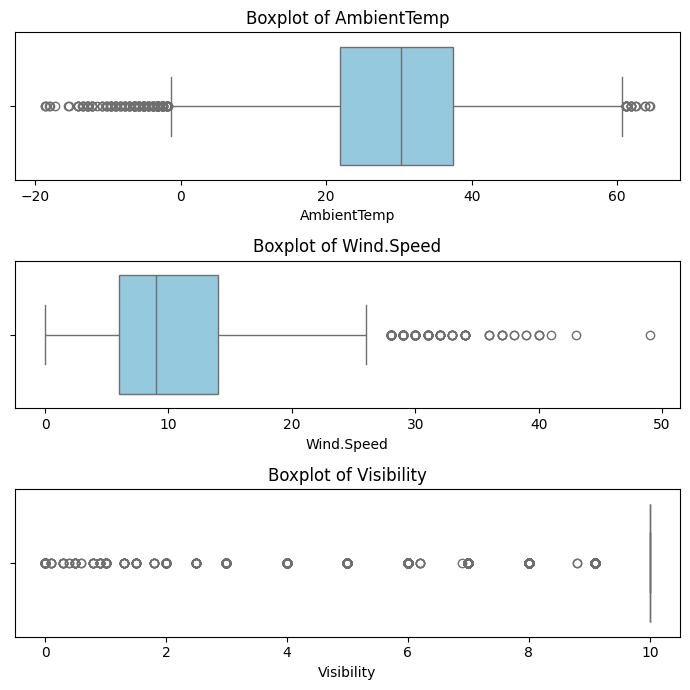

In [57]:
# Boxplot before handling outliers
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=x_train[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [58]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(x_train)}')

filtered_entries = np.array([True] * len(x_train))

# Select features with outliers
for col in columns_to_handle_outliers:

    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((x_train[col] >= lower_bound) & (x_train[col] <= upper_bound)) & filtered_entries

x_train_filtered = x_train[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(x_train_filtered)}')

The number of rows before filtering out outliers : 14731
The number of rows after filtering out outliers: 13478


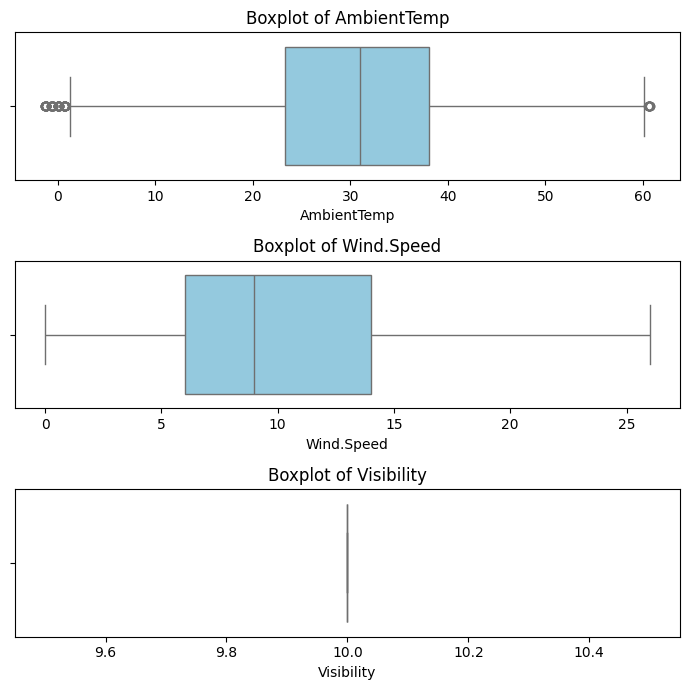

In [60]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=x_train_filtered[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

# Feature Scaling

Scaling will be done to train and test data

In [63]:
x_train

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
13683      9    15  52.72217     18.71025           8        10.0     814.5   
6340       2    11  44.03687     35.53352          17        10.0    1023.7   
2820       7    10  31.54907     31.59836          14        10.0     856.9   
6427       3    13  36.07178     33.56720          17        10.0    1008.8   
20948      9    14  25.37231     39.40575          13        10.0     807.8   
...      ...   ...       ...          ...         ...         ...       ...   
11284      8    14  25.92163     35.43030           8        10.0     960.1   
11964      8    15  60.22949     28.32787          14        10.0     984.9   
5390       8    12  42.46216     42.57805           5        10.0    1019.3   
860        8    10  60.41870     24.49341           3        10.0    1010.9   
15795      6    11  30.32837     37.44194          11        10.0    1006.9   

       Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
13683             34   26                     0                 0   
6340             722   24                     0                 0   
2820             722   28                     0                 0   
6427              37   12                     0                 0   
20948             32    6                     0                 0   
...              ...  ...                   ...               ...   
11284            722   26                     0                 0   
11964             60   16                     0                 0   
5390             722    2                     0                 0   
860               18   12                     1                 0   
15795            722   20                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
13683                    0              0                 0               0   
6340                     0              1                 0               0   
2820                     1              0                 0               0   
6427                     0              1                 0               0   
20948                    0              0                 0               0   
...                    ...            ...               ...             ...   
11284                    0              0                 0               0   
11964                    0              0                 0               1   
5390                     0              1                 0               0   
860                      0              0                 0               0   
15795                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
13683                   0                   0                0   
6340                    0                   0                0   
2820                    0                   0                0   
6427                    0                   0                0   
20948                   0                   0                0   
...                   ...                 ...              ...   
11284                   0                   1                0   
11964                   0                   0                0   
5390                    0                   0                0   
860                     0                   0                0   
15795                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
13683                  1                0               0            1   
6340                   0                0               0            0   
2820                   0                0               0            0   
6427                   0                0               0            0   
20948                  0                0               1            1   
...                  ...              ...  

In [65]:
len(x_train.columns)

25

In [64]:
x_test

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
20644      7    11  35.69336     34.77318           7        10.0     805.6   
20802      8    15  10.96802     58.63594          10        10.0     804.5   
6836      11    13  71.70410     25.25124          18        10.0    1014.8   
5865      11    13  36.25488     41.87813           3        10.0    1012.8   
7628       5    14  53.44849     31.05705          21        10.0    1014.8   
...      ...   ...       ...          ...         ...         ...       ...   
2359       8    10  84.39941     26.43456           6        10.0     984.9   
673        7    12  17.24243     43.85704          10        10.0    1011.3   
12659      6    15  99.98779     23.30254          17        10.0     972.2   
13138      6    15  22.19238     28.33542           7        10.0     816.2   
15348      7    11  22.33276     46.36719           3        10.0     820.1   

       Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
20644             24   27                     0                 0   
20802            120   16                     0                 0   
6836              70   15                     0                 0   
5865             722   22                     0                 0   
7628             722   31                     0                 0   
...              ...  ...                   ...               ...   
2359             722   17                     0                 1   
673              722   11                     1                 0   
12659             12   25                     0                 0   
13138            160   30                     0                 0   
15348            722   24                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
20644                    0              0                 0               0   
20802                    0              0                 0               0   
6836                     0              0                 1               0   
5865                     0              1                 0               0   
7628                     0              0                 1               0   
...                    ...            ...               ...             ...   
2359                     0              0                 0               0   
673                      0              0                 0               0   
12659                    0              0                 0               0   
13138                    0              0                 0               0   
15348                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
20644                   0                   0                0   
20802                   0                   0                0   
6836                    0                   0                0   
5865                    0                   0                0   
7628                    0                   0                0   
...                   ...                 ...              ...   
2359                    0                   0                0   
673                     0                   0                0   
12659                   0                   0                1   
13138                   0                   0                0   
15348                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
20644                  0                0               1            0   
20802                  0                0               1            0   
6836                   0                0               0            1   
5865                   0                0               0            1   
7628                   0                0               0            0   
...                  ...              ...  

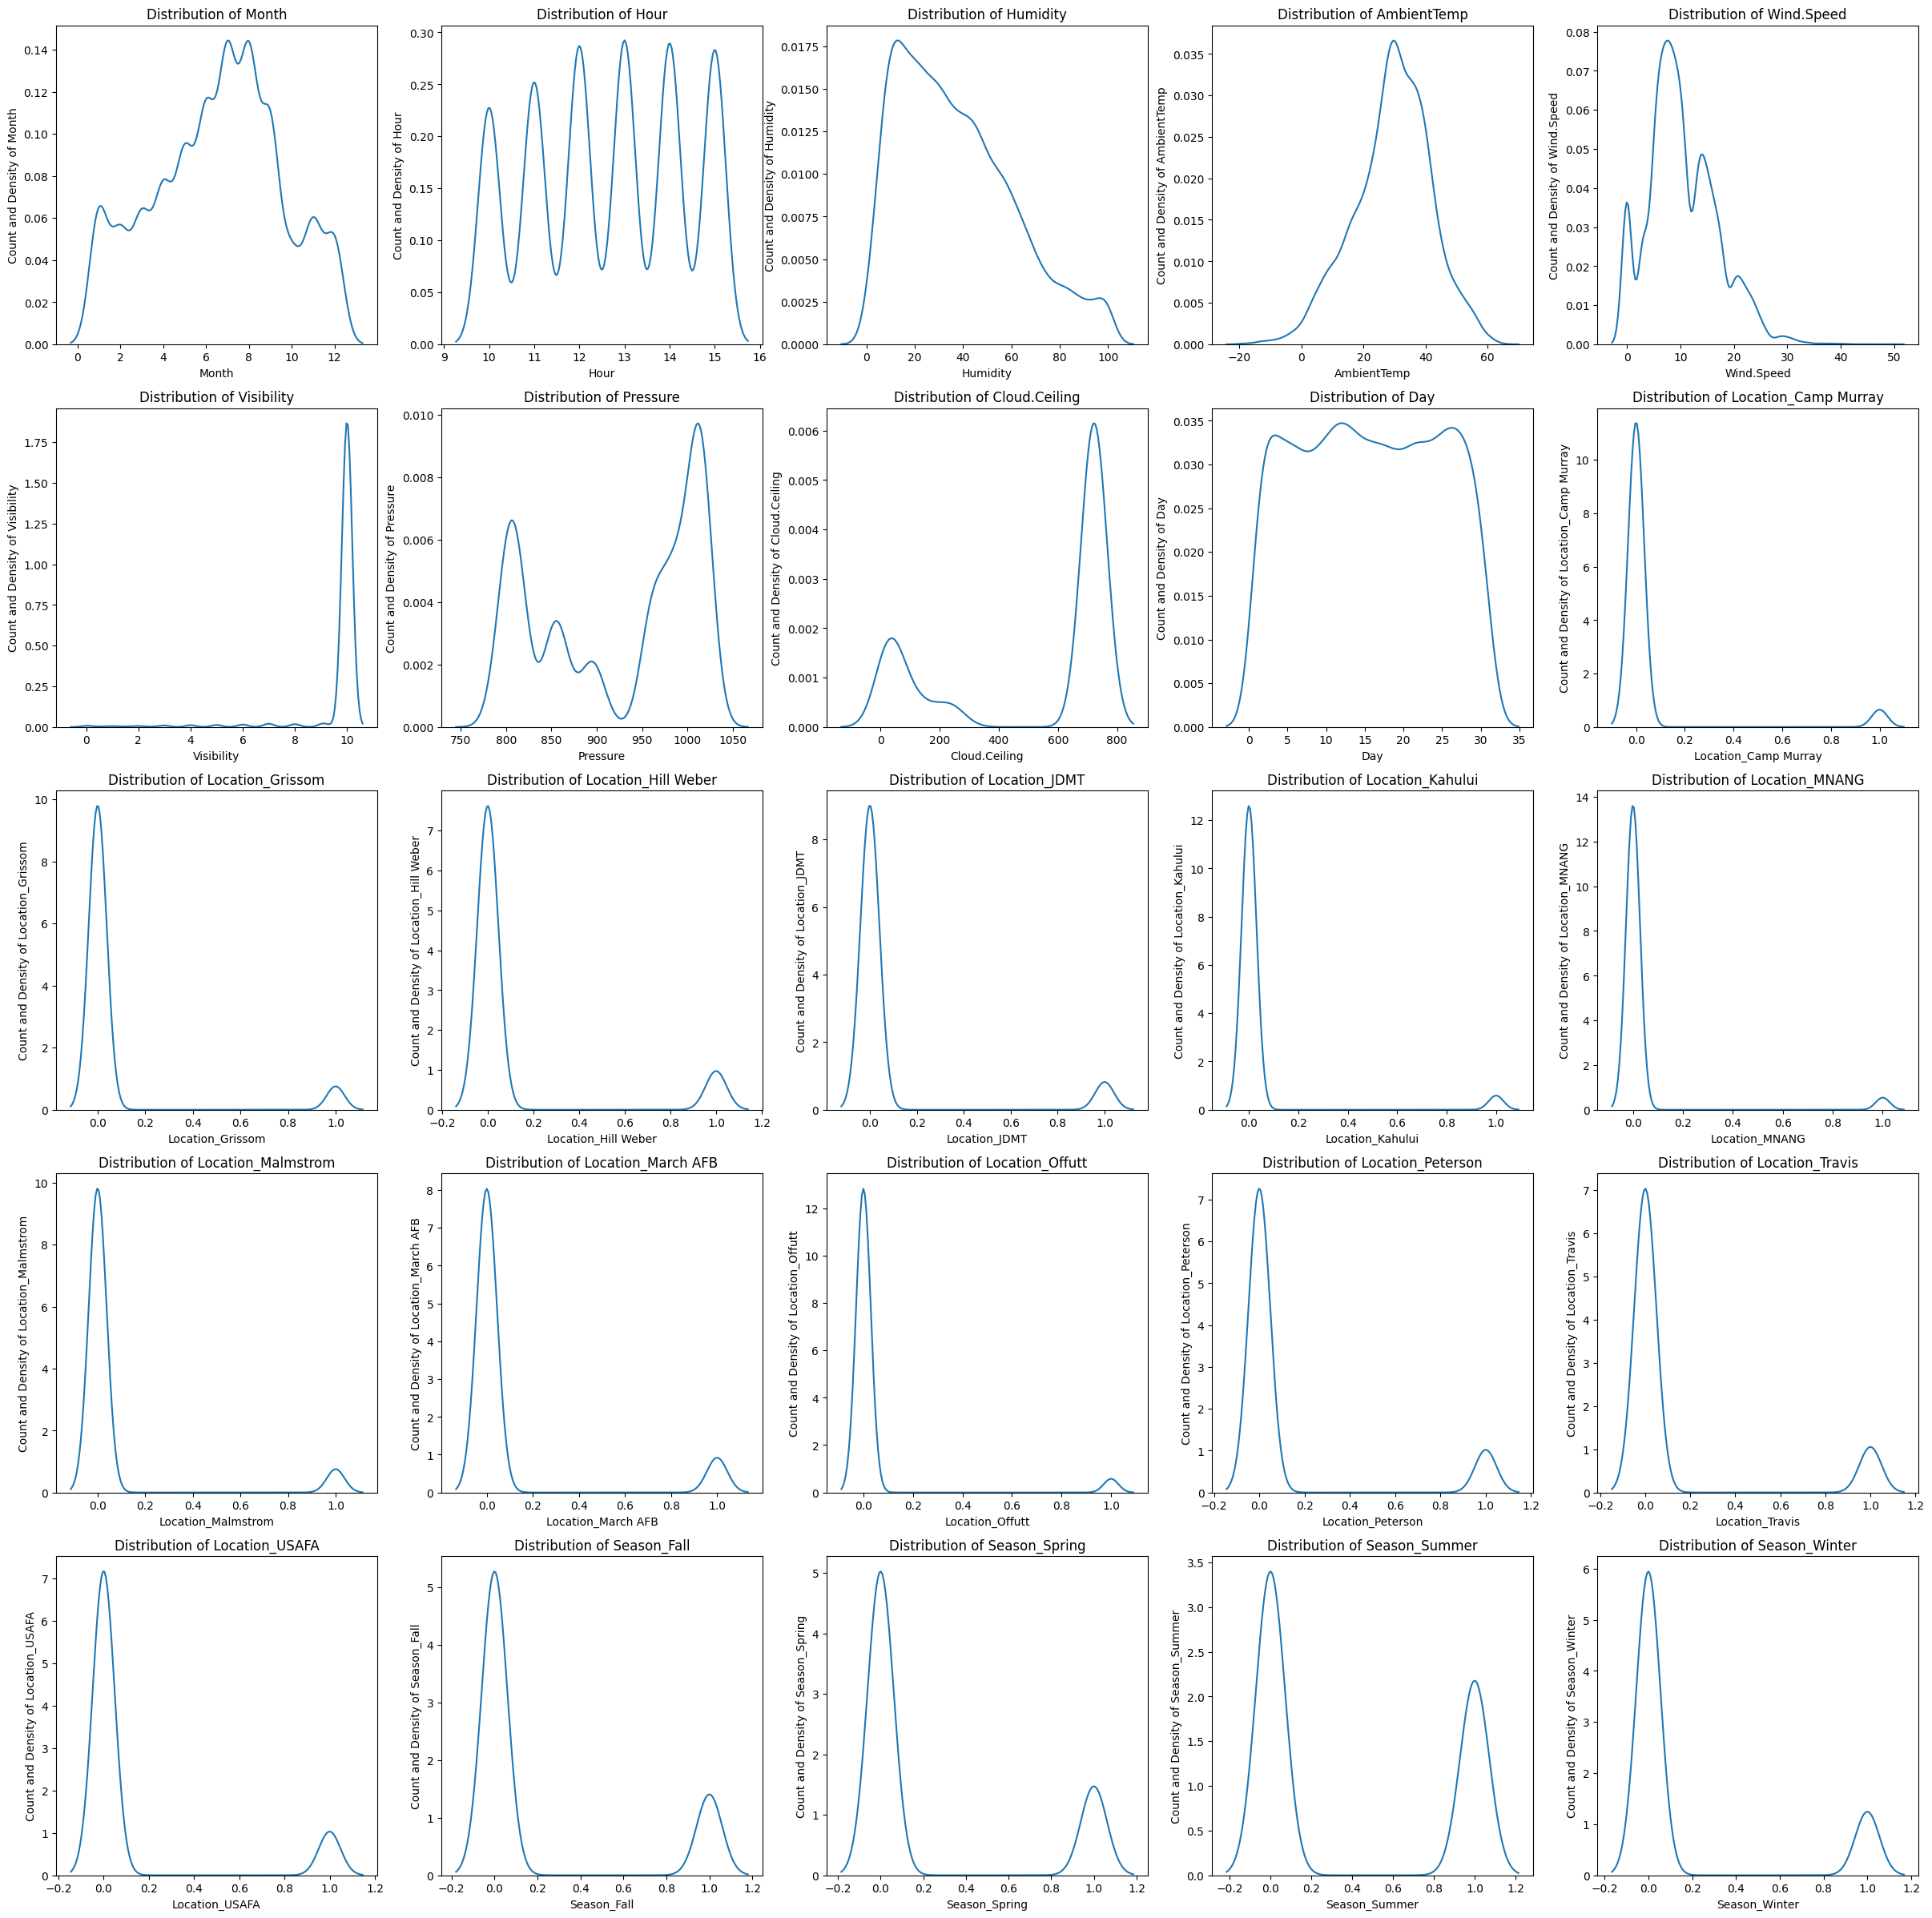

In [68]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

    plt.tight_layout()

**Additional thing to remember about scaling multi-modal distribution**

- When dealing with features that have a multi-modal distribution, like the hour feature you mentioned with values [10, 11, 12, 13, 14, 15], scaling might not be as crucial as it is for some other types of data. Scaling is typically more important when working with algorithms that are sensitive to the scale of the input features, such as distance-based algorithms (e.g., k-nearest neighbors) or optimization algorithms (e.g., gradient descent).

- For categorical features like hours of the day, you might consider using techniques like one-hot encoding or ordinal encoding, depending on the nature of the data and the specific machine learning algorithm you plan to use. One-hot encoding represents each category as a binary column, while ordinal encoding assigns integer values based on the order of the categories.

- If you still want to scale the feature for some reason, you can use techniques like Min-Max scaling or Z-score normalization. However, keep in mind that the choice of scaling method might depend on the characteristics of your data and the requirements of your specific machine learning model. Since the hour feature has a limited range, scaling might not have a significant impact on its distribution. Always consider the context and the characteristics of your data when deciding whether or not to scale a particular feature.

In [69]:
x_train.columns

Index(['Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Day', 'Location_Camp Murray',
       'Location_Grissom', 'Location_Hill Weber', 'Location_JDMT',
       'Location_Kahului', 'Location_MNANG', 'Location_Malmstrom',
       'Location_March AFB', 'Location_Offutt', 'Location_Peterson',
       'Location_Travis', 'Location_USAFA', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

We will do scaling for non-binary features that we got in encoding process, so we will do this on Humidity, AmbientTemp, Wind.Speed, Visibility, Pressure, and Cloud.Ceiling

In [ ]:
# #Normalization (MinMaxScaller)
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()

# columns_to_scale = ['Income', 'Age', 'Experience', 'Income_Age_Ratio', 'Profession', 'City', 'State'] #pilih kolom tertentu untuk dilakukan scaling (sesuai keterangan mentor)
# # columns_to_scale = x_train.columns.to_list() #pilih semua kolom

# scale_features = x_train[columns_to_scale]
# for n in scale_features:
#   x_train[n] = ms.fit_transform(x_train[[n]])
#   x_test[n] = ms.fit_transform(x_test[[n]])
#   # scaler.to_pickle(filename)

In [70]:
#Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

columns_to_scale = ['Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ss.fit_transform(x_train[[n]])
  x_test[n] = ss.fit_transform(x_test[[n]])
  # scaler.to_pickle(filename)

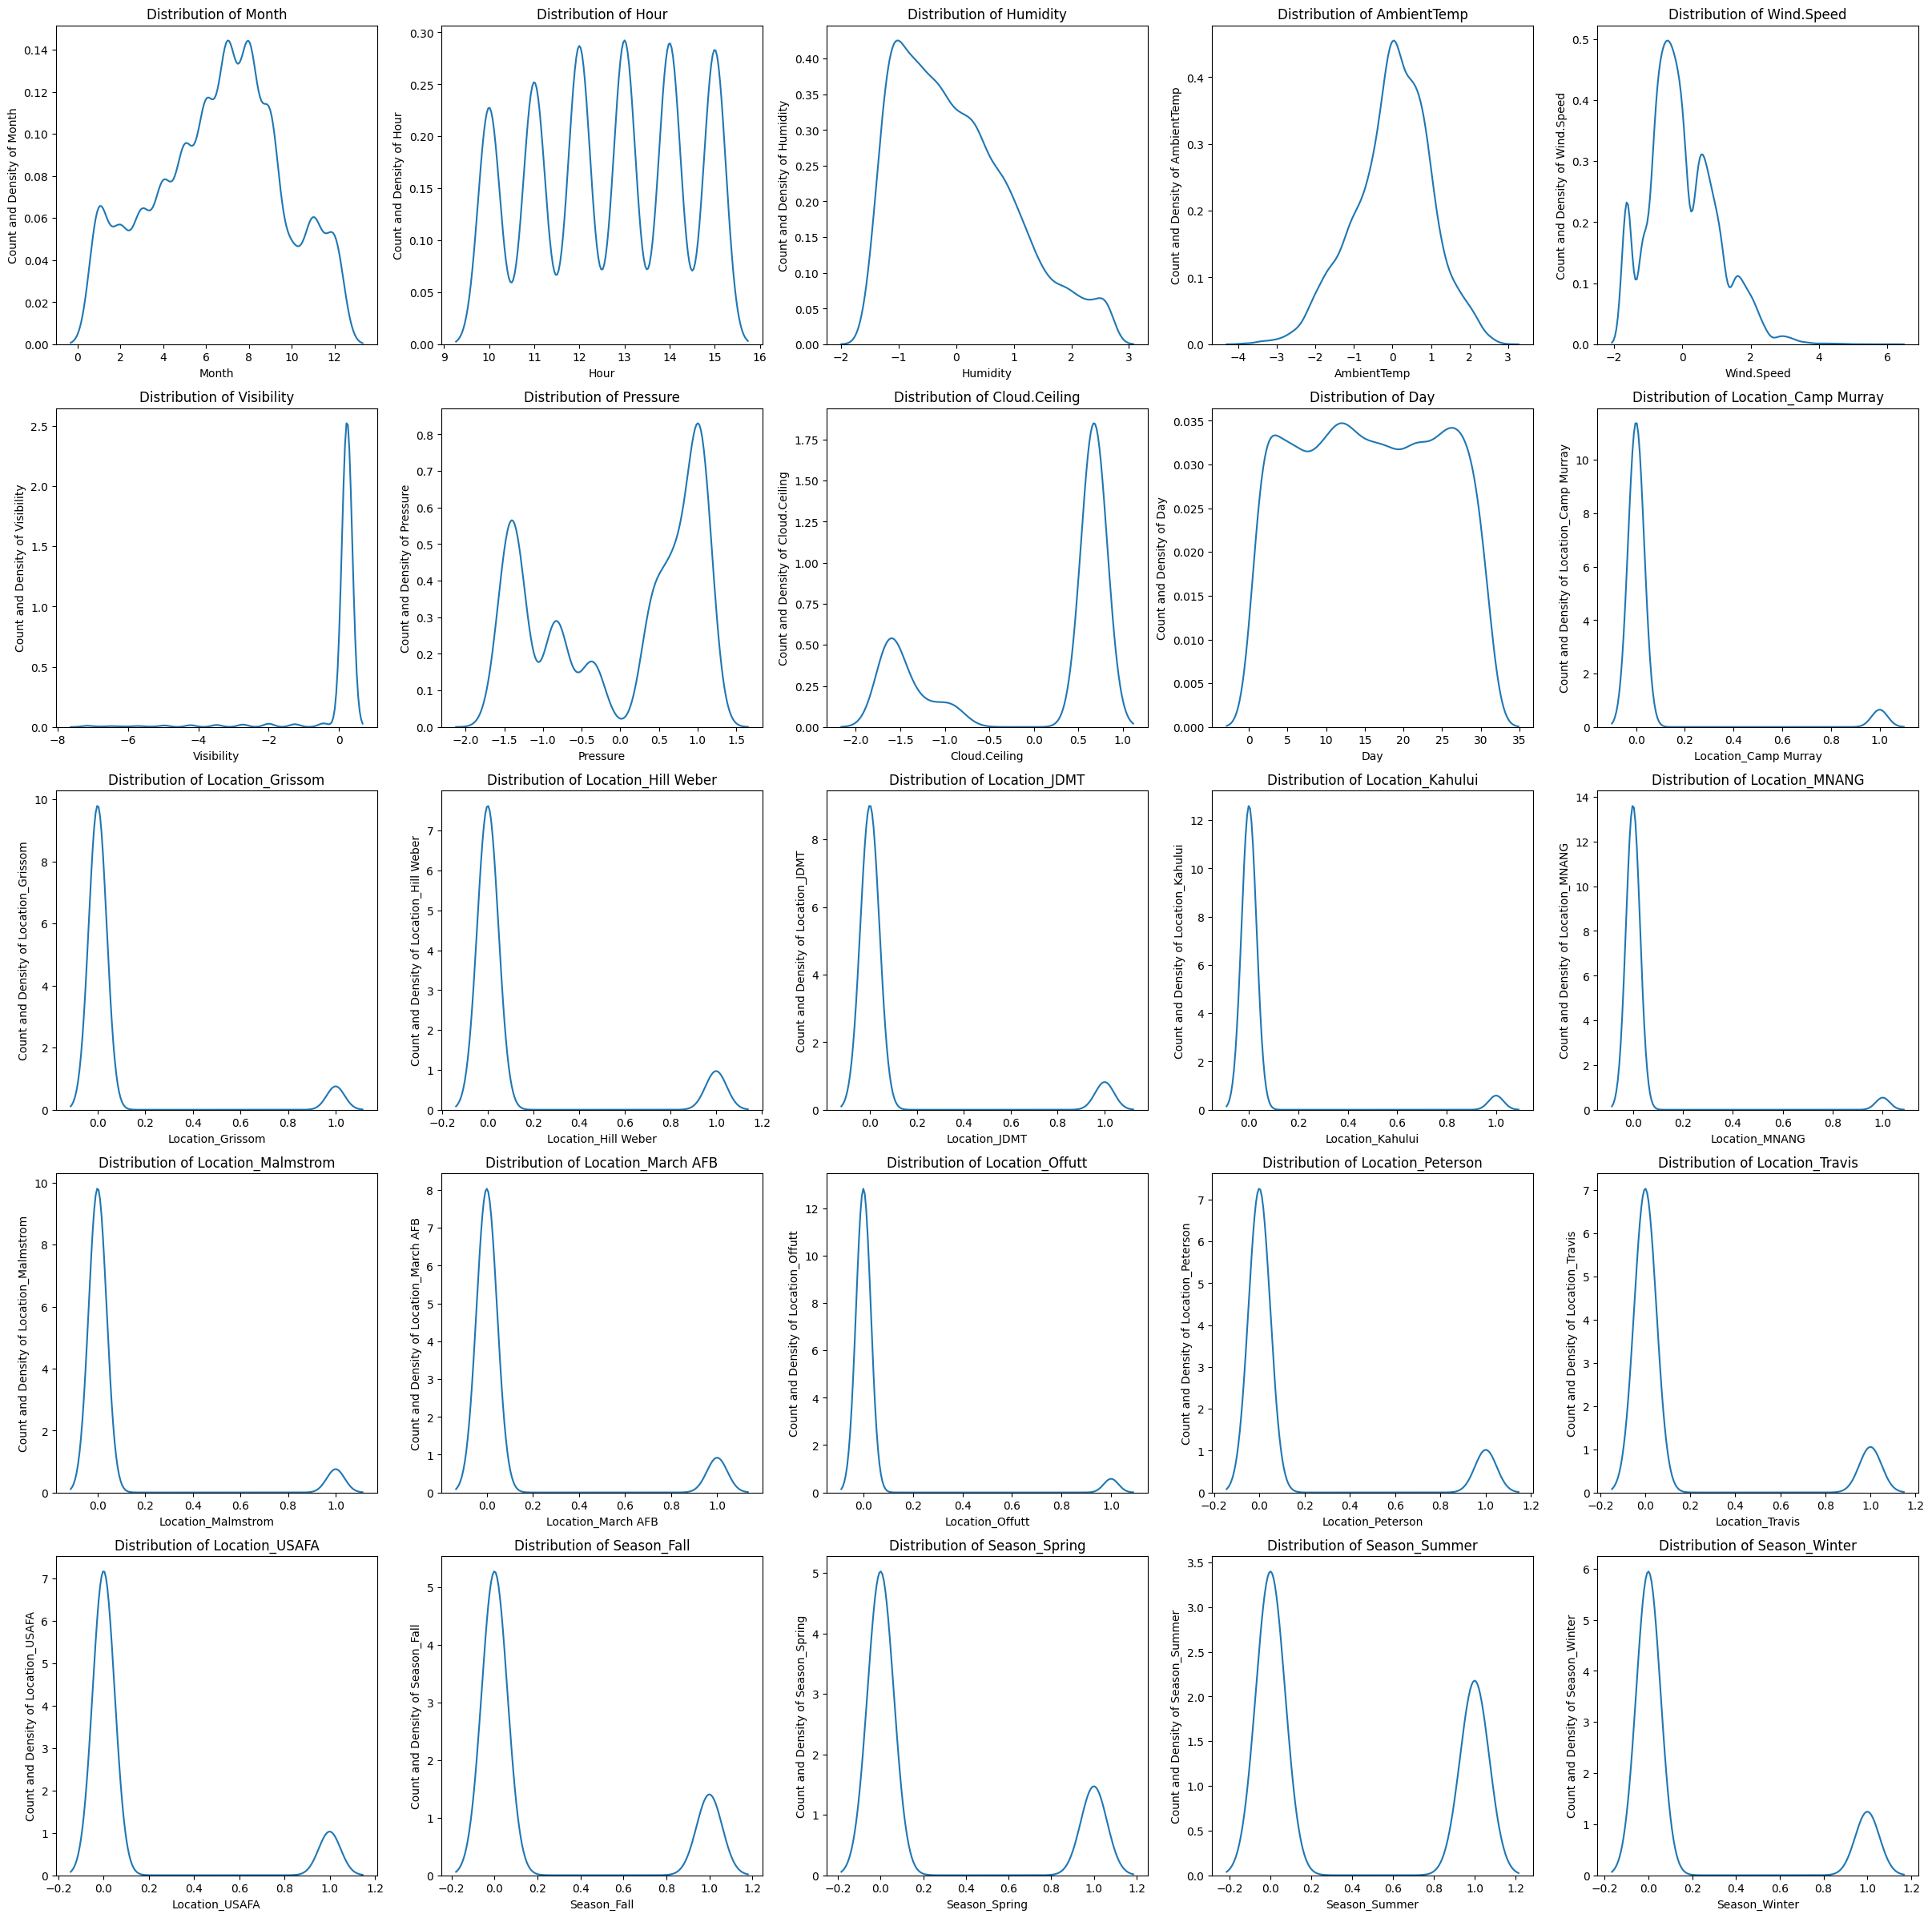

In [71]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

    plt.tight_layout()

# Modelling

## Train Regression Models